In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
from preprocess import preprocess_text
from preprocess import clean_df
from sklearn.preprocessing import LabelEncoder


In [2]:
X_train = pd.read_csv("labelled_newscatcher_dataset.csv", sep=";")

X, y = clean_df(X_train, 2)

c:\Users\quent\OneDrive\Bureau\NLP\NLP_project\preprocess.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text["title"] = text["title"].astype(str)


In [5]:
y.unique()

array(['SCIENCE', 'TECHNOLOGY', 'HEALTH', 'WORLD', 'ENTERTAINMENT',
       'SPORTS', 'BUSINESS', 'NATION'], dtype=object)

In [4]:

print(X_test["Genre"].value_counts())

Genre
Affection      100
Environment     25
Death           13
Music           12
Name: count, dtype: int64


(array([239.,   0.,   0., 234.,   0.,   0., 141.,   0.,   0., 227.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

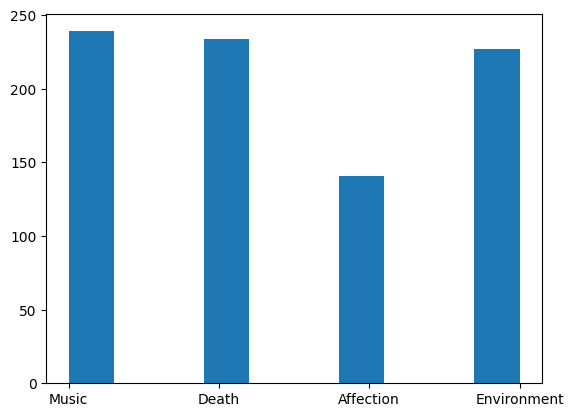

In [5]:
plt.hist(X_train["Genre"])  


In [6]:
X_train

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
...,...,...
836,Environment,Why make so much of fragmentary blue In here a...
837,Environment,"Woman, I wish I didn't know your name. What co..."
838,Environment,"Yonder to the kiosk, beside the creek, Paddle ..."
839,Environment,You come to fetch me from my work to-night Whe...


In [7]:
X_train

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
...,...,...
836,Environment,Why make so much of fragmentary blue In here a...
837,Environment,"Woman, I wish I didn't know your name. What co..."
838,Environment,"Yonder to the kiosk, beside the creek, Paddle ..."
839,Environment,You come to fetch me from my work to-night Whe...


In [8]:
X_train = clean_df(X_train, 2)
X_test = clean_df(X_test, 2)

In [9]:
X_train

,Genre,Poem
0,Music,thick brushthey spend hottest part day soaking...
1,Music,storm generous something easy surrender sittin...
2,Music,ana mendieta carry around matin star hold one ...
3,Music,aja sherrard 20the portent may memory stevensh...
4,Music,bob marley bavaria november 1980 brilliant mor...
...,...,...
832,Environment,make much fragmentary blue bird butterfly flow...
833,Environment,woman wish know name could silence house front...
834,Environment,yonder kiosk beside creek paddle swift caque t...
835,Environment,come fetch work supper table see leave burying...


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



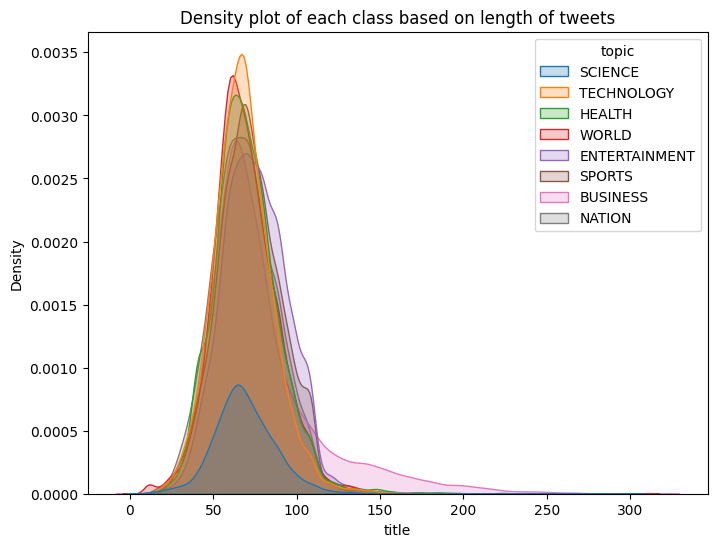

In [14]:
import seaborn as sns



plt.figure(figsize=(8,6))


sns.kdeplot(data = X_train, x = X_train["title"].str.len(), hue = "topic", fill = "True" ) # Show density plot for each categories compared to the length of the tweet

plt.title("Density plot of each class based on length of tweets")
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder() # instantiate a label encoder 
X_train['Genre_enc'] = label_encoder.fit_transform(X_train['Genre']) # fit and transform the encoder on labels
X_test['Genre_enc'] = label_encoder.fit_transform(X_test['Genre']) # fit and transform the encoder on labels

In [12]:
y_train = X_train.Genre_enc
y_test = X_test.Genre_enc

In [16]:
print(X_train["Genre"].value_counts())

Genre
Music          238
Death          231
Environment    227
Affection      141
Name: count, dtype: int64


In [12]:
class_labels = ['SCIENCE', 'TECHNOLOGY', 'HEALTH', 'WORLD', 'ENTERTAINMENT', 'SPORTS', 'BUSINESS', 'NATION']

label_encoder = LabelEncoder() # instantiate a label encoder 
y_enc = label_encoder.fit_transform(y)
y_enc

array([4, 4, 4, ..., 2, 1, 5])

In [13]:
from model_class import Model
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier as RFC

tfidf_model = Model(X,y_enc, MultinomialNB(),CountVectorizer, class_labels) # Instanciate the model class
tfidf_model.fit() # Fitting the model
y_pred = tfidf_model.predict() # Make the predictions
class_labels=label_encoder.inverse_transform(range(8))

tfidf_model.report(y_pred,class_labels) # Show report on model performances

               precision    recall  f1-score   support

     BUSINESS       0.79      0.74      0.76      2922
ENTERTAINMENT       0.85      0.86      0.85      2952
       HEALTH       0.71      0.86      0.78      3006
       NATION       0.69      0.66      0.67      2970
      SCIENCE       0.88      0.76      0.82       764
       SPORTS       0.93      0.91      0.92      3009
   TECHNOLOGY       0.86      0.86      0.86      3111
        WORLD       0.69      0.64      0.66      3021

     accuracy                           0.79     21755
    macro avg       0.80      0.79      0.79     21755
 weighted avg       0.79      0.79      0.79     21755

